<a href="https://colab.research.google.com/github/honey1126/mini-project-ML-Sep20-/blob/main/MiniProject(Apple_and_Leamon%2CSreeja_y).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
import bing_image_downloader

In [3]:
cd '/content/drive/My Drive/python/Machine Learning'

/content/drive/My Drive/python/Machine Learning


In [4]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [5]:
from bing_image_downloader import downloader
downloader.download('apple fruit', limit=15,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://www.healthbenefitstimes.com/9/gallery/apple/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.chhajedgarden.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/0/4/04_apples.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://jooinn.com/images/red-apple-fruit-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.theayurveda.org/wp-content/uploads/2015/08/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://dairyfoodblog.files.wordpress.com/2017/08/apple4.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://treefruit.wsu.edu/wp-content/uploads/2014/10/clonal-apples.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://aggie-horticulture.tamu.edu/vegetable/files/2011/10/apple26.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://www.znaturalfoods.com/1501-

In [6]:
cd '/content/drive/My Drive/python/Machine Learning'

/content/drive/My Drive/python/Machine Learning


In [7]:
!pwd

/content/drive/My Drive/python/Machine Learning


In [8]:
downloader.download('lemon fruit', limit= 15,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from http://liveseasoned.com/wp-content/uploads/2015/06/Lemon-Whole-Split.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://images6.fanpop.com/image/photos/34900000/Lemon-fruit-34914820-1000-1000.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://media.istockphoto.com/photos/lemon-fruit-with-half-and-leaves-isolated-on-white-picture-id466175634
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.britannica.com/84/188484-050-F27B0049/lemons-tree.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.homedepot-static.com/productImages/7878cb23-8698-40db-b5d4-fcc033a08385/svn/bloomsz-fruit-trees-plants-06315-64_1000.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://thumbs.dreamstime.com/z/lemon-fruit-white-25232053.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://lemonconcentrate.com/wp-content/uploads/2017/08/lemon-fr

In [9]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

RESIZE AND FLATEN


In [10]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

target = []
images = []   # In matrix format
flat_data = []  # In vector format

DATADIR = '/content/drive/My Drive/python/Machine Learning/images'
CATEGORIES = ['apple fruit','lemon fruit']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

In [11]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category) # joining the path of datadir and category to access our images data
  print(path)


/content/drive/My Drive/python/Machine Learning/images/apple fruit
/content/drive/My Drive/python/Machine Learning/images/lemon fruit


In [12]:
print(flat_data[3])# checking flat_data
print(len(flat_data[3]))

[0.60784314 0.16470588 0.14098039 ... 0.50686275 0.25431373 0.12313725]
67500


In [13]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

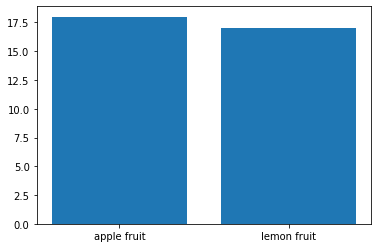

In [14]:
unique,count= np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

CLASSIFICATION ALGORTHMS

In [15]:
# using knn and finding parmaters with GridSearch cv
#x = df.iloc[:,0:67500].values
#y = df.iloc[:,67500].values

In [16]:
#from sklearn.model_selection import GridSearchCV # is used to get k nn value
#from sklearn.neighbors import KNeighborsClassifier
#import numpy as np
#z = np.arange(1,12) 
#param = {'n_neighbors':z} # knn value genrated 
#model =  KNeighborsClassifier()
#model_grid = GridSearchCV(model,param)
#model_grid.fit(x,y)

In [17]:
#model_grid.best_params_

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size =0.3,random_state=109)

In [19]:
print(x_train.shape)
print(y_train.shape)

(24, 67500)
(24,)


In [20]:
from sklearn.model_selection import GridSearchCV #using svc -support vector classification
from sklearn import svm
param_grid = [
              {'C':[1,10.100,1000],'kernel':['linear']},
              {'C':[1,10.100,1000],'gamma':[0.001,0.0001],'kernel':['linear']},
]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10.1, 1000], 'kernel': ['linear']},
                         {'C': [1, 10.1, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [22]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
accuracy_score(y_pred,y_test)

1.0

In [25]:
confusion_matrix(y_pred,y_test)

array([[4, 0],
       [0, 7]])

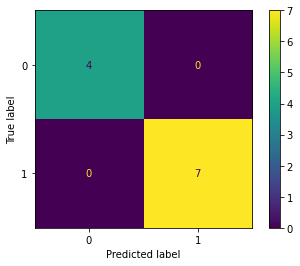

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

In [27]:
#saving the model using pickle
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [28]:
model = pickle.load(open('img_model.p','rb'))

Enter your URlhttps://media.istockphoto.com/photos/red-apple-picture-id186843005?k=6&m=186843005&s=612x612&w=0&h=BmOanZ9Cq3NQBcfNzu3C7kIAWW7wLxTbOvyFtmeJDpU=
(612, 526, 3)
predicted output: apple fruit


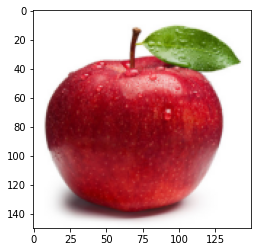

In [29]:
#testing new image
flat_data = []
url = input('Enter your URl')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'predicted output: {y_out}')